https://datamart.cccco.edu/Students/Student.aspx

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

 # ------------------------------- * * * * * * * * * ---------------------------------- #


Full-term Student Count - [Enrollment Status Summary Report](https://datamart.cccco.edu/Students/Enrollment_Status.aspx)

In [2]:
# preliminary reading of head count by College
count_df = pd.read_csv('../data/HeadCount_College_v2.csv')
count_df

,Unnamed: 0,Unnamed: 1,Fall 2016,Fall 2016.1,Fall 2017,Fall 2017.1,Fall 2018,Fall 2018.1,Fall 2019,Fall 2019.1,...,Winter 2020,Winter 2020.1,Winter 2021,Winter 2021.1,Winter 2022,Winter 2022.1,Winter 2023,Winter 2023.1,Winter 2024,Winter 2024.1
0,State Name,College Name,Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),...,Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%)
1,State of California,Alameda,"6,557",0.39%,"5,928",0.35%,"6,566",0.39%,"6,080",0.37%,...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
2,State of California,Allan Hancock,"15,637",0.93%,"15,228",0.91%,"14,364",0.85%,"14,592",0.88%,...,"1,197",0.49%,"1,289",0.61%,"1,221",0.67%,"1,473",0.70%,"1,818",0.74%
3,State of California,American River,"31,062",1.85%,"32,359",1.92%,"31,827",1.89%,"31,652",1.91%,...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
4,State of California,Antelope Valley,"14,522",0.87%,"14,567",0.87%,"14,699",0.87%,"14,376",0.87%,...,"2,990",1.22%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,State of California,West Hills Lemoore,"4,337",0.26%,"4,562",0.27%,"4,629",0.28%,"4,732",0.29%,...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
117,State of California,West LA,"12,712",0.76%,"12,299",0.73%,"13,719",0.82%,"13,941",0.84%,...,"5,466",2.23%,"4,987",2.36%,"3,899",2.14%,"3,199",1.53%,"3,749",1.53%
118,State of California,West Valley,"10,570",0.63%,"7,881",0.47%,"9,951",0.59%,"9,849",0.59%,...,"1,935",0.79%,"2,000",0.95%,"1,521",0.83%,"1,481",0.71%,"1,574",0.64%
119,State of California,Woodland,"3,762",0.22%,"4,190",0.25%,"4,235",0.25%,"3,865",0.23%,...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%


In [3]:
# drop 1st column ('Unnamed: 0'- State Name), rename ('Unnamed: 1' to 'college'), and drop first row
count_df = count_df.drop(columns=['Unnamed: 0']).rename(columns={'Unnamed: 1': 'college'})
count_df = count_df.drop(index=0)

# rename ('.1' to '%')
count_df.columns = [col.replace('.1', ' %') for col in count_df.columns]
count_df


,college,Fall 2016,Fall 2016 %,Fall 2017,Fall 2017 %,Fall 2018,Fall 2018 %,Fall 2019,Fall 2019 %,Fall 2020,...,Winter 2020,Winter 2020 %,Winter 2021,Winter 2021 %,Winter 2022,Winter 2022 %,Winter 2023,Winter 2023 %,Winter 2024,Winter 2024 %
1,Alameda,"6,557",0.39%,"5,928",0.35%,"6,566",0.39%,"6,080",0.37%,"5,983",...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
2,Allan Hancock,"15,637",0.93%,"15,228",0.91%,"14,364",0.85%,"14,592",0.88%,"11,277",...,"1,197",0.49%,"1,289",0.61%,"1,221",0.67%,"1,473",0.70%,"1,818",0.74%
3,American River,"31,062",1.85%,"32,359",1.92%,"31,827",1.89%,"31,652",1.91%,"25,931",...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
4,Antelope Valley,"14,522",0.87%,"14,567",0.87%,"14,699",0.87%,"14,376",0.87%,"12,322",...,"2,990",1.22%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
5,Bakersfield,"22,990",1.37%,"23,490",1.40%,"25,218",1.50%,"26,997",1.63%,"25,697",...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,West Hills Lemoore,"4,337",0.26%,"4,562",0.27%,"4,629",0.28%,"4,732",0.29%,"4,074",...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%
117,West LA,"12,712",0.76%,"12,299",0.73%,"13,719",0.82%,"13,941",0.84%,"11,769",...,"5,466",2.23%,"4,987",2.36%,"3,899",2.14%,"3,199",1.53%,"3,749",1.53%
118,West Valley,"10,570",0.63%,"7,881",0.47%,"9,951",0.59%,"9,849",0.59%,"8,207",...,"1,935",0.79%,"2,000",0.95%,"1,521",0.83%,"1,481",0.71%,"1,574",0.64%
119,Woodland,"3,762",0.22%,"4,190",0.25%,"4,235",0.25%,"3,865",0.23%,"4,059",...,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%


In [4]:
# full view of all the colleges in this data 
with pd.option_context('display.max_rows', None):
    print(count_df['college'])
    

1                  Alameda
2            Allan Hancock
3           American River
4          Antelope Valley
5              Bakersfield
6                  Barstow
7            Berkeley City
8                    Butte
9                 Cabrillo
10               CalBright
11                  Canada
12                 Canyons
13                Cerritos
14              Cerro Coso
15          Chabot Hayward
16                 Chaffey
17                  Citrus
18                  Clovis
19               Coastline
20                Columbia
21                 Compton
22            Contra Costa
23         Copper Mountain
24          Cosumnes River
25           Crafton Hills
26                  Cuesta
27                Cuyamaca
28                 Cypress
29                  Deanza
30                  Desert
31           Diablo Valley
32                 East LA
33               El Camino
34        Evergreen Valley
35           Feather River
36             Folsom Lake
37                Foothill
3

In [5]:
print(f"\nNumber of Community Colleges in this dataset: {len(count_df)}")


Number of Community Colleges in this dataset: 120


In [6]:
# Transform dataset from wide to long 

# Separate count and % columns
count_cols = [col for col in count_df.columns if '%' not in col and col != 'college']
pct_cols   = [col for col in count_df.columns if '%' in col]

# Melt counts
df_counts = count_df.melt(id_vars='college', value_vars=count_cols, var_name='term_year', value_name='count')
# print(df_counts)

# Melt percentages
df_pct = count_df.melt(id_vars='college', value_vars=pct_cols, var_name='term_year', value_name='percent')
# print(df_pct)

# Clean term_year in percentage dataframe
df_pct['term_year'] = df_pct['term_year'].str.replace(' %', '')

# Merge counts and percentages
count_ldf = pd.merge(df_counts, df_pct, on=['college','term_year'])

# Split term_year into term and year
count_ldf[['term','year']] = count_ldf['term_year'].str.split(' ', expand=True)

# Drop old term_year column
# count_ldf = count_ldf.drop(columns=['term_year'])

# remove commas and % from count and Pe
count_ldf['count'] = count_ldf['count'].replace(',', '', regex=True).astype(float)
count_ldf['percent'] = count_ldf['percent'].replace('%','', regex=True).astype(float)

count_ldf

,college,term_year,count,percent,term,year
0,Alameda,Fall 2016,6557.0,0.39,Fall,2016
1,Allan Hancock,Fall 2016,15637.0,0.93,Fall,2016
2,American River,Fall 2016,31062.0,1.85,Fall,2016
3,Antelope Valley,Fall 2016,14522.0,0.87,Fall,2016
4,Bakersfield,Fall 2016,22990.0,1.37,Fall,2016
...,...,...,...,...,...,...
4315,West Hills Lemoore,Winter 2024,NaN,0.00,Winter,2024
4316,West LA,Winter 2024,3749.0,1.53,Winter,2024
4317,West Valley,Winter 2024,1574.0,0.64,Winter,2024
4318,Woodland,Winter 2024,NaN,0.00,Winter,2024


In [7]:
# check why there are NaNs - view full view
with pd.option_context('display.max_rows', None):
    display(count_ldf[count_ldf['count'].isna()])

,college,term_year,count,percent,term,year
9,CalBright,Fall 2016,NaN,0.0,Fall,2016
60,Madera,Fall 2016,NaN,0.0,Fall,2016
129,CalBright,Fall 2017,NaN,0.0,Fall,2017
180,Madera,Fall 2017,NaN,0.0,Fall,2017
249,CalBright,Fall 2018,NaN,0.0,Fall,2018
300,Madera,Fall 2018,NaN,0.0,Fall,2018
408,LA ITV,Fall 2019,NaN,0.0,Fall,2019
420,Madera,Fall 2019,NaN,0.0,Fall,2019
528,LA ITV,Fall 2020,NaN,0.0,Fall,2020
575,San Francisco Ctrs,Fall 2020,NaN,0.0,Fall,2020


In [8]:
count_ldf[count_ldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
28,Deanza,Fall 2016,21867.0,1.31,Fall,2016
148,Deanza,Fall 2017,20826.0,1.24,Fall,2017
268,Deanza,Fall 2018,19638.0,1.17,Fall,2018
388,Deanza,Fall 2019,18880.0,1.14,Fall,2019
508,Deanza,Fall 2020,18872.0,1.29,Fall,2020
628,Deanza,Fall 2021,17091.0,1.26,Fall,2021
748,Deanza,Fall 2022,16411.0,1.18,Fall,2022
868,Deanza,Fall 2023,17190.0,1.14,Fall,2023
988,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1108,Deanza,Spring 2016,19643.0,1.19,Spring,2016


In [9]:
print(f"\nTotal Number of NaNs: {count_ldf['count'].isna().sum()}")

print(f"\nNumber of Community Colleges in Long Data: {count_ldf['college'].nunique()}")
print(f"\nNumber of Community Colleges without Winter 2017 Data: {count_ldf[(count_ldf['term_year'] == 'Winter 2017') & (count_ldf['count'].isna())].shape[0]}")
      
print(f"Number of Community Colleges without Winter 2018 Data: {count_ldf[(count_ldf['term_year'] == 'Winter 2018') & (count_ldf['count'].isna())].shape[0]}")
print(f"Number of Community Colleges without Winter 2019 Data: {count_ldf[(count_ldf['term_year'] == 'Winter 2019') & (count_ldf['count'].isna())].shape[0]}")
      
print(f"Number of Community Colleges without Winter 2023 Data: {count_ldf[(count_ldf['term_year'] == 'Winter 2023') & (count_ldf['count'].isna())].shape[0]}")
print(f"Number of Community Colleges without Winter 2024 Data: {count_ldf[(count_ldf['term_year'] == 'Winter 2024') & (count_ldf['count'].isna())].shape[0]}")
      
count_ldf[(count_ldf['term_year'] == 'Winter 2018')]


Total Number of NaNs: 830

Number of Community Colleges in Long Data: 120

Number of Community Colleges without Winter 2017 Data: 86
Number of Community Colleges without Winter 2018 Data: 83
Number of Community Colleges without Winter 2019 Data: 83
Number of Community Colleges without Winter 2023 Data: 85
Number of Community Colleges without Winter 2024 Data: 84


,college,term_year,count,percent,term,year
3480,Alameda,Winter 2018,NaN,0.00,Winter,2018
3481,Allan Hancock,Winter 2018,1262.0,0.50,Winter,2018
3482,American River,Winter 2018,NaN,0.00,Winter,2018
3483,Antelope Valley,Winter 2018,3243.0,1.28,Winter,2018
3484,Bakersfield,Winter 2018,NaN,0.00,Winter,2018
...,...,...,...,...,...,...
3595,West Hills Lemoore,Winter 2018,NaN,0.00,Winter,2018
3596,West LA,Winter 2018,4367.0,1.72,Winter,2018
3597,West Valley,Winter 2018,1870.0,0.74,Winter,2018
3598,Woodland,Winter 2018,NaN,0.00,Winter,2018


In [10]:
# count NaNs in enrollment per school. 
nan_counts = count_ldf['count'].isna().groupby(count_ldf['college']).sum()
print(nan_counts.sort_values(ascending=False).head(10))

college
CalBright             28
LA ITV                26
Madera                23
San Francisco Ctrs    23
Mt. San Jacinto        9
Reedley College        9
Redwoods               9
Porterville            9
Palomar                9
Palo Verde             9
Name: count, dtype: int64


## When we observe which rows have NaNs, there are a few colleges that have repeating NaNs- CalBright, LA ITV, Madera, and San Francisco Ctrs.

- LA ITV (Los Angeles Instructional Television)  -> Not a standalone California Community College, extension of LA Community College District distance education program 

- CalBright -> Not a traditional community college <b>campus</b>. Fully online, public college accredited by California Community College system. 

- Madera Community College: Established in 2020, lacks recent student enrollment data

- San Francisco Ctrs: Not a standalone California Community College. Extension centers for City College of San Francisco


### Winter Data is unavailable for roughly 83/120 colleges. If we subtract the 4 colleges above, that is 79/116 colleges that do not provide Winter data. Upon further research, 3 community colleges (De Anza, Foothill, Lake Tahoe Community Colleges) operate on a Quarter System, while the rest 113 operate on a Semester system. Of those 37 community colleges that released Winter enrollment data, community colleges offer condensed winter and summer terms, sometimes called "intersessions" to allow for more flexibile course scheduling.

### For this reason, Winter enrollment data will be excluded from the final analysis to ensure consistency across colleges. Including Winter terms would disproportionately represent quarter-system institutions and intersession programs, skewing the overall trends. 


In [11]:
# Drop NaNs/Unnecessary Data

# drop data on LA ITV, CalBright, Madera, and San Francisco
count_cldf = count_ldf[~count_ldf['college'].isin(['Madera', 'CalBright', 'San Francisco Ctrs', 'LA ITV'])]

# drop Winter terms
count_cldf = count_cldf[~count_cldf['term'].str.startswith('Winter')]
count_cldf

,college,term_year,count,percent,term,year
0,Alameda,Fall 2016,6557.0,0.39,Fall,2016
1,Allan Hancock,Fall 2016,15637.0,0.93,Fall,2016
2,American River,Fall 2016,31062.0,1.85,Fall,2016
3,Antelope Valley,Fall 2016,14522.0,0.87,Fall,2016
4,Bakersfield,Fall 2016,22990.0,1.37,Fall,2016
...,...,...,...,...,...,...
3235,West Hills Lemoore,Summer 2024,2963.0,0.36,Summer,2024
3236,West LA,Summer 2024,5066.0,0.62,Summer,2024
3237,West Valley,Summer 2024,5513.0,0.67,Summer,2024
3238,Woodland,Summer 2024,1695.0,0.21,Summer,2024


In [12]:
count_cldf[count_cldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
28,Deanza,Fall 2016,21867.0,1.31,Fall,2016
148,Deanza,Fall 2017,20826.0,1.24,Fall,2017
268,Deanza,Fall 2018,19638.0,1.17,Fall,2018
388,Deanza,Fall 2019,18880.0,1.14,Fall,2019
508,Deanza,Fall 2020,18872.0,1.29,Fall,2020
628,Deanza,Fall 2021,17091.0,1.26,Fall,2021
748,Deanza,Fall 2022,16411.0,1.18,Fall,2022
868,Deanza,Fall 2023,17190.0,1.14,Fall,2023
988,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1108,Deanza,Spring 2016,19643.0,1.19,Spring,2016


In [13]:
print(count_cldf['term'].unique())
print(f"\nNumber of Community Colleges in cleaned dataset: {count_cldf['college'].nunique()}")
count_cldf = count_cldf.dropna(subset=['count']).reset_index(drop=True)
count_cldf

['Fall' 'Spring' 'Summer']

Number of Community Colleges in cleaned dataset: 116


,college,term_year,count,percent,term,year
0,Alameda,Fall 2016,6557.0,0.39,Fall,2016
1,Allan Hancock,Fall 2016,15637.0,0.93,Fall,2016
2,American River,Fall 2016,31062.0,1.85,Fall,2016
3,Antelope Valley,Fall 2016,14522.0,0.87,Fall,2016
4,Bakersfield,Fall 2016,22990.0,1.37,Fall,2016
...,...,...,...,...,...,...
3126,West Hills Lemoore,Summer 2024,2963.0,0.36,Summer,2024
3127,West LA,Summer 2024,5066.0,0.62,Summer,2024
3128,West Valley,Summer 2024,5513.0,0.67,Summer,2024
3129,Woodland,Summer 2024,1695.0,0.21,Summer,2024


,year,count
0,2016,4034459.0
1,2017,4044917.0
2,2018,4045790.0
3,2019,4009617.0
4,2020,3764716.0
5,2021,3421878.0
6,2022,3328931.0
7,2023,3647259.0
8,2024,3895514.0


,year,count,YoY_pct
0,2016,4034459.0,NaN
1,2017,4044917.0,0.259217
2,2018,4045790.0,0.021583
3,2019,4009617.0,-0.894090
4,2020,3764716.0,-6.107840
5,2021,3421878.0,-9.106610
6,2022,3328931.0,-2.716257
7,2023,3647259.0,9.562469
8,2024,3895514.0,6.806618


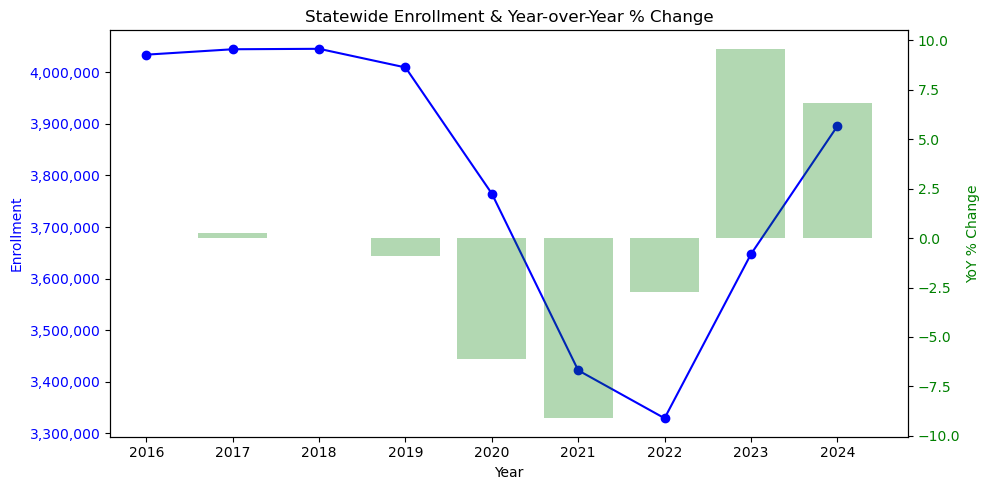

In [14]:
# Statewide Enrollment by Year
statewide_by_year = count_cldf.groupby('year')['count'].sum().reset_index()
display(statewide_by_year)

# YoY percent change
statewide_by_year['YoY_pct'] = statewide_by_year['count'].pct_change() * 100
display(statewide_by_year)

fig, ax1 = plt.subplots(figsize=(10,5))

# Line plot of enrollment
ax1.plot(statewide_by_year['year'], statewide_by_year['count'], marker='o', color='b', label='Enrollment')
ax1.set_xlabel('Year')
ax1.set_ylabel('Enrollment', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Secondary axis for YoY %
ax2 = ax1.twinx()
ax2.bar(statewide_by_year['year'], statewide_by_year['YoY_pct'], alpha=0.3, color='g', label='YoY % Change')
ax2.set_ylabel('YoY % Change', color='g')
ax2.tick_params(axis='y', labelcolor='g')



plt.title('Statewide Enrollment & Year-over-Year % Change')
fig.tight_layout()
plt.show()

Looking at statewide enrollment from 2016 to 2024, we can observe clear trends and significant shifts in the year-over-year (YoY) percentages.

---

### **2016–2019: Relatively Stable**
- Enrollment hovered around **4 million** students.
- YoY changes were minor:
  - 2017: +0.26%
  - 2018: +0.02%
  - 2019: -0.89%
- Indicates a stable enrollment period with small fluctuations, likely due to normal demographic changes or graduation rates.

---

### **2020–2022: Sharp Decline**
- 2020: **3,764,716** students (-6.1% YoY)
- 2021: **3,421,878** students (-9.1% YoY)
- 2022: **3,328,931** students (-2.7% YoY)
- Likely factors:
  - COVID-19 pandemic impacting attendance, enrollment, and transfers
  - Economic uncertainty causing some students to delay or forgo higher education
  - Possible policy changes affecting enrollment reporting

---

### **2023–2024: Strong Rebound**
- 2023: **3,647,259** students (+9.6% YoY)
- 2024: **3,895,514** students (+6.8% YoY)
- Suggests a post-pandemic recovery with students returning to college and new admissions increasing.

---

### **Overall Observations**
- **2016–2019:** Stable baseline enrollment  
- **2020–2022:** Pandemic-related decline, sharpest drop in 2021  
- **2023–2024:** Recovery phase, with enrollment trending upward but not yet at pre-2020 peak  
- YoY percentages highlight both the **impact of the pandemic** and the **subsequent rebound**

term,Fall,Spring,Summer
year,,,
2016,1649967.0,1617644.0,766848.0
2017,1650944.0,1608675.0,785298.0
2018,1654696.0,1603160.0,787934.0
2019,1638694.0,1592516.0,778407.0
2020,1454450.0,1538105.0,772161.0
2021,1350215.0,1373792.0,697871.0
2022,1378964.0,1269560.0,680407.0
2023,1508230.0,1372233.0,766796.0
2024,1576424.0,1501141.0,817949.0


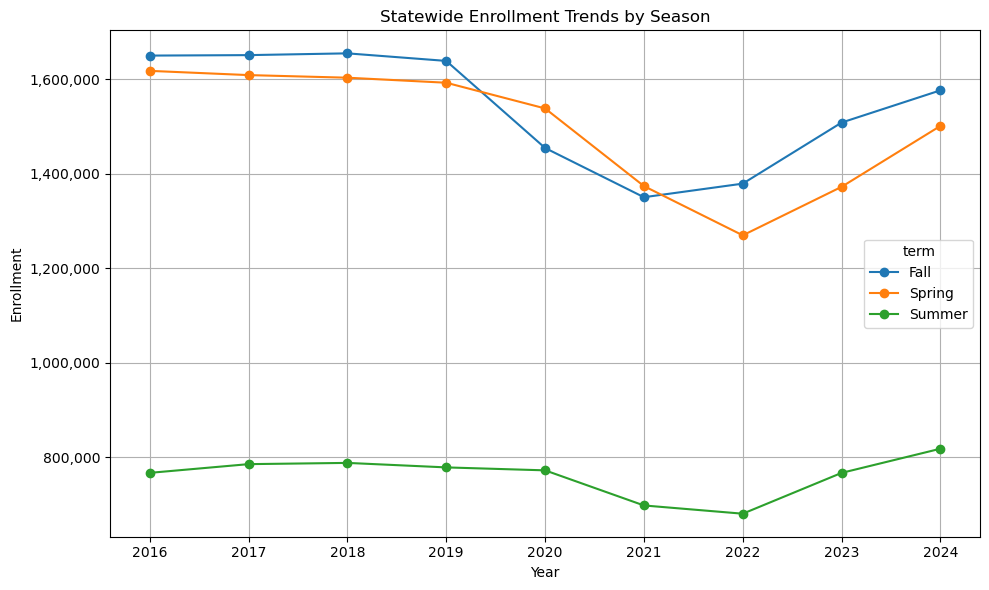

In [15]:
# Enrollment Trend by Season 
seasonal_trends = count_cldf.groupby(['year', 'term'])['count'].sum().unstack()
display(seasonal_trends)

# Plot
seasonal_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Statewide Enrollment Trends by Season')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()

### **Analysis by Term**

#### **Fall Term**
- Enrollment is usually the **highest of the three terms** each year.  
- Stable from 2016–2019 (~1.64–1.65M).  
- Drops sharply in 2020 (1.45M) and 2021 (1.35M) due to the pandemic.  
- Recovery begins in 2023 (1.51M) and continues in 2024 (1.58M).

#### **Spring Term**
- Slightly lower than Fall consistently.  
- Declines more gradually during 2020–2022.  
- Recovery in 2023 and 2024 mirrors Fall, suggesting students are returning mid-year as well.

#### **Summer Term**
- Enrollment is always the lowest (~680k–788k), likely reflecting shorter sessions and lower demand.  
- Drops during the pandemic (2020–2022), then rebounds by 2024 (817,949), exceeding pre-pandemic levels.

---

### **Overall Observations**
- **Seasonal trends:** Fall > Spring > Summer consistently.  
- **Pandemic impact:** Largest drops in Fall 2020–2021; Summer terms also decline but less drastically.  
- **Recovery:** All terms show rebound in 2023–2024, with Summer enrollment surpassing pre-pandemic numbers by 2024.  
- These term-level patterns align with the overall statewide trends observed previously, emphasizing both the short-term pandemic impact and the ongoing recovery.

In [16]:
# see what the difference between fall and spring difference was. 

In [17]:
count_cldf[count_cldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
27,Deanza,Fall 2016,21867.0,1.31,Fall,2016
143,Deanza,Fall 2017,20826.0,1.24,Fall,2017
259,Deanza,Fall 2018,19638.0,1.17,Fall,2018
375,Deanza,Fall 2019,18880.0,1.14,Fall,2019
491,Deanza,Fall 2020,18872.0,1.29,Fall,2020
607,Deanza,Fall 2021,17091.0,1.26,Fall,2021
723,Deanza,Fall 2022,16411.0,1.18,Fall,2022
839,Deanza,Fall 2023,17190.0,1.14,Fall,2023
955,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1070,Deanza,Spring 2016,19643.0,1.19,Spring,2016


 # ------------------------------- * * * * * * * * * ---------------------------------- #

[Enrollment Status Summary Report](https://datamart.cccco.edu/Students/Enrollment_Status.aspx)

Enrollment statuses:
- Continuing Student
- First-Time Student
- First-Time Transfer Student
- Returning Student
- Special Admit Student
- Uncollected/Unreported

In [18]:
# preliminary reading of dataset
status_df = pd.read_csv('../data/StudentEnrollmentStatus.csv')
status_df

,Unnamed: 0,Unnamed: 1,Fall 2016,Fall 2016.1,Fall 2017,Fall 2017.1,Fall 2018,Fall 2018.1,Fall 2019,Fall 2019.1,...,Winter 2020,Winter 2020.1,Winter 2021,Winter 2021.1,Winter 2022,Winter 2022.1,Winter 2023,Winter 2023.1,Winter 2024,Winter 2024.1
0,State Name,Enrollment Status,Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),...,Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%)
1,State of California,Continuing Student,"944,158",56.37%,"933,511",55.53%,"945,785",56.25%,"902,798",54.41%,...,"154,671",63.21%,"148,253",70.21%,"114,690",62.91%,"127,973",61.11%,"151,797",61.88%
2,State of California,First-Time Student,"290,068",17.32%,"286,447",17.04%,"265,439",15.79%,"267,385",16.11%,...,"19,986",8.17%,"8,425",3.99%,"8,328",4.57%,"8,554",4.08%,"10,459",4.26%
3,State of California,First-Time Transfer Student,"132,166",7.89%,"134,024",7.97%,"137,259",8.16%,"118,752",7.16%,...,"14,240",5.82%,"11,593",5.49%,"10,956",6.01%,"11,319",5.41%,"14,440",5.89%
4,State of California,Returning Student,"188,807",11.27%,"195,752",11.64%,"178,429",10.61%,"189,941",11.45%,...,"13,091",5.35%,"16,527",7.83%,"15,880",8.71%,"16,610",7.93%,"19,507",7.95%
5,State of California,Special Admit Student,"63,883",3.81%,"73,878",4.39%,"91,231",5.43%,"106,497",6.42%,...,"7,458",3.05%,"8,504",4.03%,"10,866",5.96%,"13,196",6.30%,"16,293",6.64%
6,State of California,Uncollected/Unreported,"55,716",3.33%,"57,583",3.43%,"63,371",3.77%,"74,026",4.46%,...,"35,256",14.41%,"17,865",8.46%,"21,575",11.84%,"31,763",15.17%,"32,830",13.38%


In [19]:
# drop 1st column ('Unnamed: 0' - State Name), rename ('Unnamed: 1' to 'status'), drop first row
status_df = status_df.drop(columns=['Unnamed: 0']).rename(columns= {'Unnamed: 1': 'status'})
status_df = status_df.drop(index=0)

# replace ('.1' to '%')
status_df.columns = [col.replace('.1', ' %') for col in status_df.columns]

status_df

,status,Fall 2016,Fall 2016 %,Fall 2017,Fall 2017 %,Fall 2018,Fall 2018 %,Fall 2019,Fall 2019 %,Fall 2020,...,Winter 2020,Winter 2020 %,Winter 2021,Winter 2021 %,Winter 2022,Winter 2022 %,Winter 2023,Winter 2023 %,Winter 2024,Winter 2024 %
1,Continuing Student,"944,158",56.37%,"933,511",55.53%,"945,785",56.25%,"902,798",54.41%,"797,251",...,"154,671",63.21%,"148,253",70.21%,"114,690",62.91%,"127,973",61.11%,"151,797",61.88%
2,First-Time Student,"290,068",17.32%,"286,447",17.04%,"265,439",15.79%,"267,385",16.11%,"231,355",...,"19,986",8.17%,"8,425",3.99%,"8,328",4.57%,"8,554",4.08%,"10,459",4.26%
3,First-Time Transfer Student,"132,166",7.89%,"134,024",7.97%,"137,259",8.16%,"118,752",7.16%,"108,668",...,"14,240",5.82%,"11,593",5.49%,"10,956",6.01%,"11,319",5.41%,"14,440",5.89%
4,Returning Student,"188,807",11.27%,"195,752",11.64%,"178,429",10.61%,"189,941",11.45%,"166,271",...,"13,091",5.35%,"16,527",7.83%,"15,880",8.71%,"16,610",7.93%,"19,507",7.95%
5,Special Admit Student,"63,883",3.81%,"73,878",4.39%,"91,231",5.43%,"106,497",6.42%,"110,469",...,"7,458",3.05%,"8,504",4.03%,"10,866",5.96%,"13,196",6.30%,"16,293",6.64%
6,Uncollected/Unreported,"55,716",3.33%,"57,583",3.43%,"63,371",3.77%,"74,026",4.46%,"45,946",...,"35,256",14.41%,"17,865",8.46%,"21,575",11.84%,"31,763",15.17%,"32,830",13.38%


In [20]:
# Data Transforming and cleaning 

# Separate count and percent columns
count_cols = [col for col in status_df.columns if '%' not in col and col != 'status']
percent_cols = [col for col in status_df.columns if '%' in col]

# Melt counts
df_counts = status_df.melt(id_vars=['status'], value_vars=count_cols, 
                           var_name='season_year', value_name='enrollment')
# print(df_counts)
# Melt percentages
df_percent = status_df.melt(id_vars=['status'], value_vars=percent_cols, 
                            var_name='season_year', value_name='percent')
# print (df_percent)

# Fix the season_year names so they match
df_percent['season_year'] = df_percent['season_year'].str.replace(' %','', regex=False)

# Merge counts and percentages
status_ldf = pd.merge(df_counts, df_percent, on=['status','season_year'])

# Clean enrollment numbers and percentages
status_ldf['enrollment'] = status_ldf['enrollment'].str.replace(',','').astype(int)
status_ldf['percent'] = status_ldf['percent'].str.replace('%','').astype(float)

print(status_ldf.head(10))

                        status season_year  enrollment  percent
0           Continuing Student   Fall 2016      944158    56.37
1           First-Time Student   Fall 2016      290068    17.32
2  First-Time Transfer Student   Fall 2016      132166     7.89
3            Returning Student   Fall 2016      188807    11.27
4        Special Admit Student   Fall 2016       63883     3.81
5       Uncollected/Unreported   Fall 2016       55716     3.33
6           Continuing Student   Fall 2017      933511    55.53
7           First-Time Student   Fall 2017      286447    17.04
8  First-Time Transfer Student   Fall 2017      134024     7.97
9            Returning Student   Fall 2017      195752    11.64


In [21]:
# check for NaNs
status_ldf.isna().sum()

status         0
season_year    0
enrollment     0
percent        0
dtype: int64

In [22]:
# drop Winter terms
status_cldf = status_ldf[~status_ldf['season_year'].str.startswith('Winter')]
print(status_cldf['season_year'].unique())

['Fall 2016' 'Fall 2017' 'Fall 2018' 'Fall 2019' 'Fall 2020' 'Fall 2021'
 'Fall 2022' 'Fall 2023' 'Fall 2024' 'Spring 2016' 'Spring 2017'
 'Spring 2018' 'Spring 2019' 'Spring 2020' 'Spring 2021' 'Spring 2022'
 'Spring 2023' 'Spring 2024' 'Summer 2016' 'Summer 2017' 'Summer 2018'
 'Summer 2019' 'Summer 2020' 'Summer 2021' 'Summer 2022' 'Summer 2023'
 'Summer 2024']


In [23]:
# extract term info (season and year) and change year dtype
status_cldf = status_cldf.copy()
status_cldf[['season', 'year']] = status_cldf['season_year'].str.extract(r'(\w+)\s(\d{4})')
status_cldf['year'] = status_cldf['year'].astype(int)
status_cldf

,status,season_year,enrollment,percent,season,year
0,Continuing Student,Fall 2016,944158,56.37,Fall,2016
1,First-Time Student,Fall 2016,290068,17.32,Fall,2016
2,First-Time Transfer Student,Fall 2016,132166,7.89,Fall,2016
3,Returning Student,Fall 2016,188807,11.27,Fall,2016
4,Special Admit Student,Fall 2016,63883,3.81,Fall,2016
...,...,...,...,...,...,...
157,First-Time Student,Summer 2024,77138,9.39,Summer,2024
158,First-Time Transfer Student,Summer 2024,74032,9.01,Summer,2024
159,Returning Student,Summer 2024,83119,10.12,Summer,2024
160,Special Admit Student,Summer 2024,102856,12.52,Summer,2024


In [24]:
# groupby enrollment data by status and year
status_table = status_cldf.groupby(['status', 'year'])['enrollment'].sum().reset_index()
# print(status_table)

# pivot table so statuses are rows and years are columns, sort years ascending
status_table = status_table.pivot(index='status', columns='year', values='enrollment').sort_index(axis=1)

# add commas for readability
status_table = status_table.applymap(lambda x: f"{int(x):,}")

# remove colum and index name 
status_table.columns.name = None
status_table.index.name = None

status_table

,2016,2017,2018,2019,2020,2021,2022,2023,2024
Continuing Student,"2,493,903","2,449,348","2,460,009","2,408,908","2,233,329","1,956,506","1,790,554","1,938,037","2,065,625"
First-Time Student,"477,834","505,293","453,996","444,381","413,602","413,828","407,313","428,375","436,698"
First-Time Transfer Student,"312,632","330,807","330,214","305,510","273,953","234,731","244,721","276,942","298,581"
Returning Student,"429,160","434,224","423,736","425,675","396,006","375,295","379,641","396,183","424,985"
Special Admit Student,"170,474","201,838","225,244","274,579","295,057","297,370","330,884","395,664","448,681"
Uncollected/Unreported,"214,725","190,345","217,559","204,968","172,541","156,229","193,119","228,179","239,478"


In [25]:
# First, filter out the data for the relevant statuses
new_students = status_cldf[status_cldf['status'].isin(['First-Time Student', 'First-Time Transfer Student'])]
continuing_students = status_cldf[status_cldf['status'] == 'Continuing Student']

# Sum enrollments by year
new_per_year = new_students.groupby('year')['enrollment'].sum()
cont_per_year = continuing_students.groupby('year')['enrollment'].sum()

# Calculate ratio: new / continuing
ratio_new_to_cont = new_per_year / cont_per_year

# Optional: make it a DataFrame for nicer display
ratio_df = ratio_new_to_cont.reset_index()
ratio_df.columns = ['year', 'new_to_cont_ratio']

ratio_df

,year,new_to_cont_ratio
0,2016,0.316959
1,2017,0.341356
2,2018,0.318783
3,2019,0.311299
4,2020,0.307861
5,2021,0.331488
6,2022,0.364152
7,2023,0.363934
8,2024,0.355960


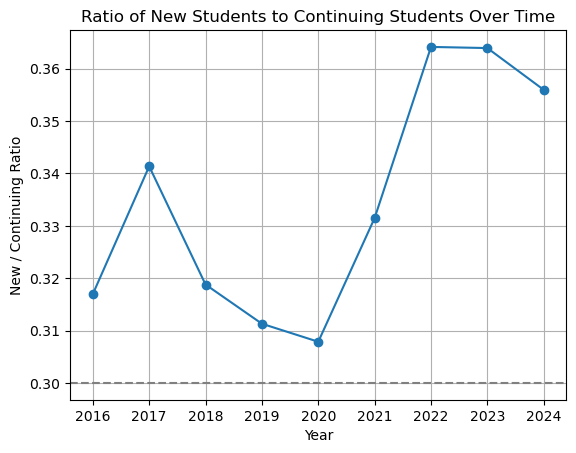

In [26]:
plt.plot(ratio_df['year'], ratio_df['new_to_cont_ratio'], marker='o')
plt.axhline(0.3, color='gray', linestyle='--')
plt.title('Ratio of New Students to Continuing Students Over Time')
plt.xlabel('Year')
plt.ylabel('New / Continuing Ratio')
plt.grid(True)
plt.show()

**Findings:**

- From 2016 to 2024, the ratio of new students to continuing students generally stays around **0.3**, meaning roughly **3 new students for every 10 continuing students**.  
- The ratio **declined slightly in 2020** but has **increased since then**, reaching its **highest point since 2017** in **2022–2023**.  
- This indicates that while continuing students still make up the majority of the population, **new student enrollment has become a relatively larger contributor to total enrollment in recent years**, particularly in the most recent peak years.

 # ------------------------------- * * * * * * * * * ---------------------------------- #

In [27]:
# preliminary reading of demographic (gender, age) dataset
demographic_df = pd.read_csv('../data/HeadCount_Demographics.csv')
demographic_df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Annual 2016-2017,Annual 2016-2017.1,Annual 2017-2018,Annual 2017-2018.1,Annual 2018-2019,Annual 2018-2019.1,Annual 2019-2020,Annual 2019-2020.1,Annual 2020-2021,Annual 2020-2021.1,Annual 2021-2022,Annual 2021-2022.1,Annual 2022-2023,Annual 2022-2023.1,Annual 2023-2024,Annual 2023-2024.1
0,State Name,Gender,Age Group,Ethnicity,Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%),Student Count,Student Count (%)
1,State of California,Female,19 or Less,African-American,"15,406",4.71%,"15,628",4.58%,"15,893",4.50%,"15,796",4.24%,"13,630",3.91%,"12,633",3.84%,"13,665",3.85%,"14,841",3.83%
2,State of California,Female,19 or Less,American Indian/Alaskan Native,"1,181",0.36%,"1,242",0.36%,"1,112",0.31%,"1,220",0.33%,966,0.28%,866,0.26%,979,0.28%,"1,181",0.30%
3,State of California,Female,19 or Less,Asian,"32,981",10.08%,"33,746",9.89%,"34,926",9.89%,"38,154",10.23%,"39,668",11.39%,"38,145",11.59%,"41,398",11.66%,"45,408",11.72%
4,State of California,Female,19 or Less,Filipino,"9,338",2.85%,"9,176",2.69%,"9,930",2.81%,"9,989",2.68%,"9,275",2.66%,"8,157",2.48%,"8,110",2.28%,"8,045",2.08%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,State of California,Unknown,Unknown,Hispanic,22,7.89%,28,9.36%,32,9.88%,35,9.97%,12,11.32%,15,12.93%,17,12.78%,38,29.92%
277,State of California,Unknown,Unknown,Multi-Ethnicity,1,0.36%,NaN,0.00%,1,0.31%,NaN,0.00%,NaN,0.00%,1,0.86%,NaN,0.00%,NaN,0.00%
278,State of California,Unknown,Unknown,Pacific Islander,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,1,0.94%,NaN,0.00%,NaN,0.00%,1,0.79%
279,State of California,Unknown,Unknown,Unknown,217,77.78%,245,81.94%,237,73.15%,276,78.63%,76,71.70%,83,71.55%,97,72.93%,73,57.48%


In [28]:
# drop 1st column ('Unnamed: 0'- State Name), rename ('Unnamed: 1' to 'gender'), 
# rename ('Unnamed: 2' to 'age group'), rename ('Unnamed: 3' to 'ethnicity'), and drop first row
demographic_df = demographic_df.drop(columns=['Unnamed: 0']).rename(columns={'Unnamed: 1': 'gender','Unnamed: 2':'age group', 'Unnamed: 3':'ethnicity'})
demographic_df = demographic_df.drop(index=0)

# clean column names: remove 'Annual' and replace ('.1' with '%')
demographic_df.columns = [col.replace('Annual ', '').replace('.1', '%') for col in demographic_df.columns]

demographic_df

,gender,age group,ethnicity,2016-2017,2016-2017%,2017-2018,2017-2018%,2018-2019,2018-2019%,2019-2020,2019-2020%,2020-2021,2020-2021%,2021-2022,2021-2022%,2022-2023,2022-2023%,2023-2024,2023-2024%
1,Female,19 or Less,African-American,"15,406",4.71%,"15,628",4.58%,"15,893",4.50%,"15,796",4.24%,"13,630",3.91%,"12,633",3.84%,"13,665",3.85%,"14,841",3.83%
2,Female,19 or Less,American Indian/Alaskan Native,"1,181",0.36%,"1,242",0.36%,"1,112",0.31%,"1,220",0.33%,966,0.28%,866,0.26%,979,0.28%,"1,181",0.30%
3,Female,19 or Less,Asian,"32,981",10.08%,"33,746",9.89%,"34,926",9.89%,"38,154",10.23%,"39,668",11.39%,"38,145",11.59%,"41,398",11.66%,"45,408",11.72%
4,Female,19 or Less,Filipino,"9,338",2.85%,"9,176",2.69%,"9,930",2.81%,"9,989",2.68%,"9,275",2.66%,"8,157",2.48%,"8,110",2.28%,"8,045",2.08%
5,Female,19 or Less,Hispanic,"172,556",52.72%,"184,052",53.94%,"191,191",54.12%,"201,470",54.03%,"179,811",51.61%,"173,195",52.62%,"192,404",54.19%,"214,063",55.23%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Unknown,Unknown,Hispanic,22,7.89%,28,9.36%,32,9.88%,35,9.97%,12,11.32%,15,12.93%,17,12.78%,38,29.92%
277,Unknown,Unknown,Multi-Ethnicity,1,0.36%,NaN,0.00%,1,0.31%,NaN,0.00%,NaN,0.00%,1,0.86%,NaN,0.00%,NaN,0.00%
278,Unknown,Unknown,Pacific Islander,NaN,0.00%,NaN,0.00%,NaN,0.00%,NaN,0.00%,1,0.94%,NaN,0.00%,NaN,0.00%,1,0.79%
279,Unknown,Unknown,Unknown,217,77.78%,245,81.94%,237,73.15%,276,78.63%,76,71.70%,83,71.55%,97,72.93%,73,57.48%


In [29]:
# Transform data

count_cols = [col for col in demographic_df.columns if '%' not in col and col not in ['college','age group','ethnicity']]
percent_cols = [col for col in demographic_df.columns if '%' in col]

# ----------------------------
# Melt counts
# ----------------------------
df_counts = demographic_df.melt(
    id_vars=['gender', 'age group', 'ethnicity'],
    value_vars=count_cols,
    var_name='Year',
    value_name='Student_Count'
)

# Melt percentages
df_percent = demographic_df.melt(
    id_vars=['gender', 'age group', 'ethnicity'],
    value_vars=percent_cols,
    var_name='Year',
    value_name='Percent'
)

# Fix Year column in percentages to match counts
df_percent['Year'] = df_percent['Year'].str.replace('%','', regex=False)

# Merge counts and percentages
demographic_ldf = pd.merge(df_counts, df_percent, on=['gender', 'age group', 'ethnicity', 'Year'])

# ----------------------------
# Clean numeric columns
# ----------------------------
demographic_ldf['Student_Count'] = demographic_ldf['Student_Count'].str.replace(',', '').astype(float)
demographic_ldf['Percent'] = demographic_ldf['Percent'].str.replace('%','').astype(float)

demographic_ldf

,gender,age group,ethnicity,Year,Student_Count,Percent
0,Female,19 or Less,African-American,2016-2017,15406.0,4.71
1,Female,19 or Less,American Indian/Alaskan Native,2016-2017,1181.0,0.36
2,Female,19 or Less,Asian,2016-2017,32981.0,10.08
3,Female,19 or Less,Filipino,2016-2017,9338.0,2.85
4,Female,19 or Less,Hispanic,2016-2017,172556.0,52.72
...,...,...,...,...,...,...
2235,Unknown,Unknown,Hispanic,2023-2024,38.0,29.92
2236,Unknown,Unknown,Multi-Ethnicity,2023-2024,NaN,0.00
2237,Unknown,Unknown,Pacific Islander,2023-2024,1.0,0.79
2238,Unknown,Unknown,Unknown,2023-2024,73.0,57.48


In [30]:
# check for nans
display(demographic_ldf[demographic_ldf.isna().any(axis=1)])

NaN_summary = demographic_ldf[demographic_ldf['Student_Count'].isna()].groupby(['gender', 'age group', 'ethnicity']).size().reset_index(name='num_missing')
NaN_summary.head(50)

,gender,age group,ethnicity,Year,Student_Count,Percent
64,Female,Unknown,American Indian/Alaskan Native,2016-2017,NaN,0.0
66,Female,Unknown,Filipino,2016-2017,NaN,0.0
68,Female,Unknown,Multi-Ethnicity,2016-2017,NaN,0.0
144,Non-Binary,19 or Less,African-American,2016-2017,NaN,0.0
145,Non-Binary,19 or Less,American Indian/Alaskan Native,2016-2017,NaN,0.0
...,...,...,...,...,...,...
2167,Non-Binary,Unknown,White Non-Hispanic,2023-2024,NaN,0.0
2231,Unknown,Unknown,African-American,2023-2024,NaN,0.0
2232,Unknown,Unknown,American Indian/Alaskan Native,2023-2024,NaN,0.0
2234,Unknown,Unknown,Filipino,2023-2024,NaN,0.0


,gender,age group,ethnicity,num_missing
0,Female,Unknown,African-American,2
1,Female,Unknown,American Indian/Alaskan Native,6
2,Female,Unknown,Filipino,4
3,Female,Unknown,Multi-Ethnicity,5
4,Female,Unknown,Pacific Islander,1
5,Male,Unknown,American Indian/Alaskan Native,2
6,Male,Unknown,Filipino,3
7,Male,Unknown,Multi-Ethnicity,1
8,Male,Unknown,Pacific Islander,5
9,Non-Binary,19 or Less,African-American,2


In [31]:
# we can see that many Non-Binarys, and Females and Males with Unknown Age Groups have NaNs in their Student_Count

# This can be seen as unknown data in these specific age groups so let's drop irrelevant NaNs
# Drop rows where Student_Count is NaN AND gender or age group or ethnicity is 'Unknown'
demographic_ldf = demographic_ldf[~(demographic_ldf['Student_Count'].isna() &
    ((demographic_ldf['gender'] == 'Unknown') | (demographic_ldf['age group'] == 'Unknown') | 
     (demographic_ldf['ethnicity'] == 'Unknown')))]

# drop rows where gender is Non-Binary AND Studnet_Count is NaN's
demographic_cldf = demographic_ldf[~(
    (demographic_ldf['gender'] == 'Non-Binary') &
    (demographic_ldf['Student_Count'].isna())
)]

# Check remaining NaNs
demographic_cldf[demographic_cldf.isna().any(axis=1)]

,gender,age group,ethnicity,Year,Student_Count,Percent


In [32]:
demographic_cldf

,gender,age group,ethnicity,Year,Student_Count,Percent
0,Female,19 or Less,African-American,2016-2017,15406.0,4.71
1,Female,19 or Less,American Indian/Alaskan Native,2016-2017,1181.0,0.36
2,Female,19 or Less,Asian,2016-2017,32981.0,10.08
3,Female,19 or Less,Filipino,2016-2017,9338.0,2.85
4,Female,19 or Less,Hispanic,2016-2017,172556.0,52.72
...,...,...,...,...,...,...
2233,Unknown,Unknown,Asian,2023-2024,2.0,1.57
2235,Unknown,Unknown,Hispanic,2023-2024,38.0,29.92
2237,Unknown,Unknown,Pacific Islander,2023-2024,1.0,0.79
2238,Unknown,Unknown,Unknown,2023-2024,73.0,57.48


## total students by gender per year

In [33]:
# Group by Year and Gender, sum Student_Count
gender_trend = demographic_ldf.groupby(['gender', 'Year'])['Student_Count'].sum().unstack()
display(gender_trend)


Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024
gender,,,,,,,,
Female,1211713.0,1219936.0,1218106.0,1199903.0,1087876.0,1012018.0,1036219.0,1111977.0
Male,1016525.0,1014337.0,1002695.0,969103.0,797353.0,788912.0,843875.0,926670.0
Non-Binary,0.0,61.0,133.0,1420.0,2945.0,5821.0,11199.0,26031.0
Unknown,25085.0,26816.0,30133.0,31177.0,23594.0,26467.0,33137.0,44006.0


## total students by gender per year 

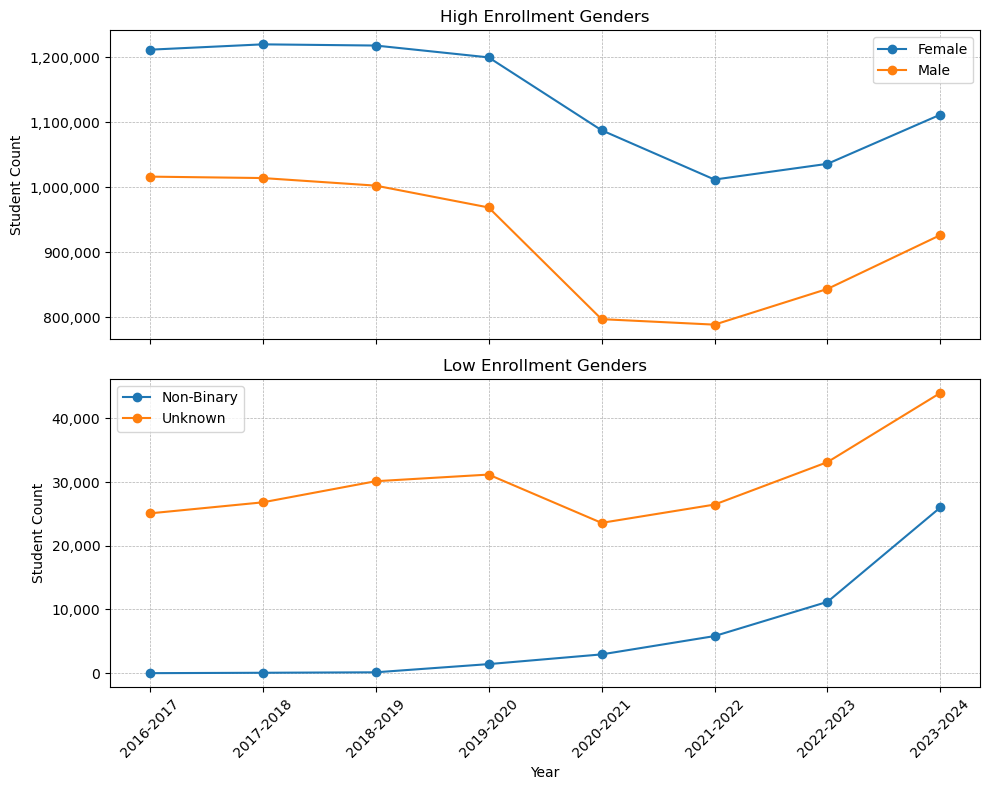

In [34]:
# Group by Gender and Year
gender_trend = demographic_ldf.groupby(['gender', 'Year'])['Student_Count'].sum().reset_index()

high_enrollment = ['Female', 'Male']  # larger groups
low_enrollment = [g for g in gender_trend['gender'].unique() if g not in high_enrollment]  # smaller groups

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# High enrollment subplot
for gender in high_enrollment:
    df = gender_trend[gender_trend['gender'] == gender].sort_values('Year')
    axes[0].plot(df['Year'], df['Student_Count'], marker='o', label=gender)
axes[0].set_title('High Enrollment Genders')
axes[0].set_ylabel('Student Count')
axes[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # comma format
axes[0].legend()
axes[0].grid(True, ls='--', linewidth=0.5)

# Low enrollment subplot
for gender in low_enrollment:
    df = gender_trend[gender_trend['gender'] == gender].sort_values('Year')
    axes[1].plot(df['Year'], df['Student_Count'], marker='o', label=gender)
axes[1].set_title('Low Enrollment Genders')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Student Count')
axes[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # comma format
axes[1].legend()
axes[1].grid(True, ls='--', linewidth=0.5)

# Rotate x-axis labels for clarity
plt.setp(axes[-1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

## total students by Ethnicity per Year

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024
ethnicity,,,,,,,,
African-American,139164.0,134270.0,131000.0,124131.0,103955.0,98420.0,105575.0,117253.0
American Indian/Alaskan Native,9875.0,9793.0,8520.0,8121.0,6574.0,6060.0,6577.0,7399.0
Asian,252930.0,254809.0,249685.0,243933.0,212602.0,203011.0,210014.0,233023.0
Filipino,61213.0,60039.0,62538.0,59403.0,52290.0,46218.0,43584.0,43274.0
Hispanic,993587.0,1029137.0,1034015.0,1027693.0,891598.0,861713.0,928017.0,1019542.0
Multi-Ethnicity,79169.0,83423.0,84311.0,81403.0,80058.0,76318.0,79018.0,86205.0
Pacific Islander,9255.0,9129.0,8749.0,8880.0,7877.0,7340.0,7250.0,7950.0
Unknown,117108.0,99105.0,108176.0,129090.0,88826.0,89842.0,98720.0,103145.0
White Non-Hispanic,591022.0,581445.0,564073.0,518949.0,467988.0,444296.0,445675.0,490893.0


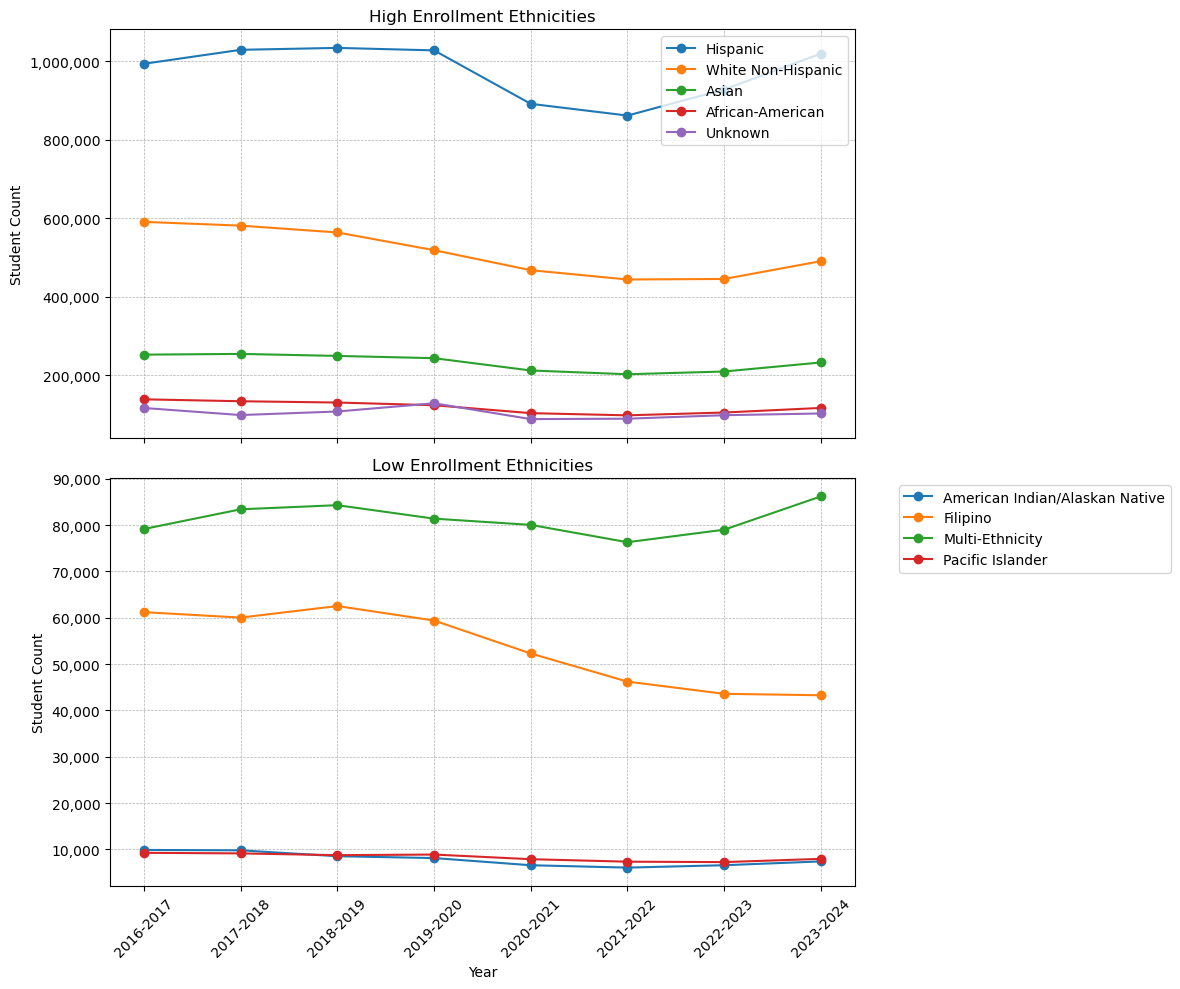

In [35]:
# Sum by Ethnicity and Year
ethnicity_trend = demographic_ldf.groupby(['ethnicity', 'Year'])['Student_Count'].sum().unstack()

display(ethnicity_trend)

# Identify high vs low enrollment (based on total across all years)
total_by_ethnicity = ethnicity_trend.sum(axis=1)
high_enrollment = total_by_ethnicity.sort_values(ascending=False).head(5).index.tolist()
low_enrollment = [e for e in ethnicity_trend.index if e not in high_enrollment]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# High enrollment subplot
for eth in high_enrollment:
    axes[0].plot(ethnicity_trend.columns, ethnicity_trend.loc[eth], marker='o', label=eth)
axes[0].set_title('High Enrollment Ethnicities')
axes[0].set_ylabel('Student Count')
axes[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # comma format
axes[0].legend()
axes[0].grid(True, ls='--', linewidth=0.5)

# Low enrollment subplot
for eth in low_enrollment:
    axes[1].plot(ethnicity_trend.columns, ethnicity_trend.loc[eth], marker='o', label=eth)
axes[1].set_title('Low Enrollment Ethnicities')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Student Count')
axes[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # comma format
axes[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
axes[1].grid(True, ls='--', linewidth=0.5)

plt.setp(axes[-1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

WHY ARE THERE SO MANY UNKNOWNS? LETS LOOK INTO THIS. !!!@!@!@!@!@!@!

## total students by Ethnicity per Year

Year,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024
age group,,,,,,,,
19 or Less,631705.0,656656.0,674263.0,706349.0,630082.0,611390.0,677656.0,749866.0
20 to 24,650355.0,633446.0,607063.0,576361.0,507082.0,456115.0,449310.0,472919.0
25 to 29,301185.0,302388.0,296207.0,279652.0,251928.0,226600.0,220074.0,231406.0
30 to 34,175495.0,174987.0,175538.0,168725.0,158112.0,154918.0,158871.0,175368.0
35 to 39,120788.0,122655.0,123956.0,118086.0,105566.0,108258.0,113633.0,132360.0
40 to 49,163290.0,161370.0,161210.0,152001.0,126713.0,131300.0,144361.0,164624.0
50 +,210003.0,209179.0,212318.0,199797.0,132038.0,144391.0,160247.0,181835.0
Unknown,502.0,469.0,512.0,632.0,247.0,246.0,278.0,306.0


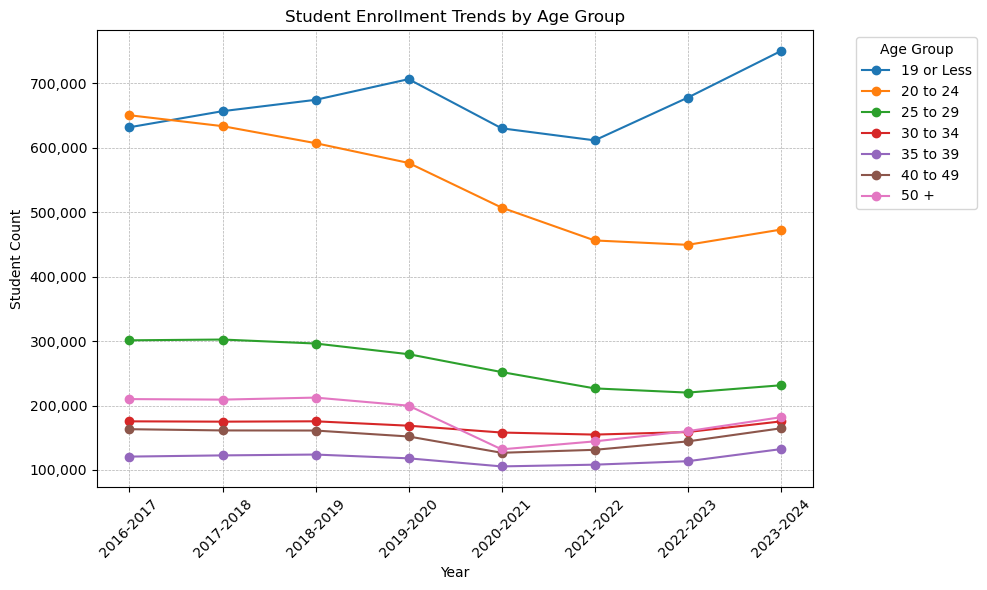

In [36]:
# Group by Age Group and Year, sum Student_Count
age_trend = demographic_ldf.groupby(['age group', 'Year'])['Student_Count'].sum().unstack()
display(age_trend)  # includes Unknown for reference

# Plot, filtering out 'Unknown'
fig, ax = plt.subplots(figsize=(10,6))

for age in age_trend.index:
    if age != 'Unknown':  # skip Unknown in the plot
        ax.plot(age_trend.columns, age_trend.loc[age], marker='o', label=age)

ax.set_title('Student Enrollment Trends by Age Group')
ax.set_xlabel('Year')
ax.set_ylabel('Student Count')
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # comma format
ax.grid(True, ls="--", linewidth=0.5)
ax.legend(title='Age Group', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# preliminary reading of enrollment status dataset BY College
# df_enrollment_status_College_2016_2024 = pd.read_csv('EnrollmentStatus_College.csv')
# df_enrollment_status
count_cldf[count_cldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
27,Deanza,Fall 2016,21867.0,1.31,Fall,2016
143,Deanza,Fall 2017,20826.0,1.24,Fall,2017
259,Deanza,Fall 2018,19638.0,1.17,Fall,2018
375,Deanza,Fall 2019,18880.0,1.14,Fall,2019
491,Deanza,Fall 2020,18872.0,1.29,Fall,2020
607,Deanza,Fall 2021,17091.0,1.26,Fall,2021
723,Deanza,Fall 2022,16411.0,1.18,Fall,2022
839,Deanza,Fall 2023,17190.0,1.14,Fall,2023
955,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1070,Deanza,Spring 2016,19643.0,1.19,Spring,2016


In [38]:
college_year = count_cldf.groupby(['college', 'year'])['count'].sum().reset_index()

# 2. Sort and calculate YoY % change per college
college_year = college_year.sort_values(['college', 'year'])
college_year['YoY_pct'] = college_year.groupby('college')['count'].pct_change() * 100

# 3. Convert count to integer and round YoY %
college_year['count'] = college_year['count'].astype(int)
college_year['YoY_pct'] = college_year['YoY_pct'].round(2)

# Sort for top/bottom
college_year_sorted_desc = college_year.sort_values(['year', 'count'], ascending=[True, False])
college_year_sorted_asc = college_year.sort_values(['year', 'count'], ascending=[True, True])

# Top 5 Colleges per Year
print("=== Top 5 Colleges Each Year ===\n")
for year, group in college_year_sorted_desc.groupby('year'):
    top5 = group.head(5)[['college', 'count', 'YoY_pct']].reset_index(drop=True)
    top5.index = top5.index + 1  # Rank column
    display(top5)

# Bottom 5 Colleges per Year
print("=== Bottom 5 Colleges Each Year ===\n")
for year, group in college_year_sorted_asc.groupby('year'):
    bottom5 = group.head(5)[['college', 'count', 'YoY_pct']].reset_index(drop=True)
    bottom5.index = bottom5.index + 1  # Rank column
    display(bottom5)

=== Top 5 Colleges Each Year ===



,college,count,YoY_pct
1,Mt San Antonio,106724,NaN
2,Santa Ana,98125,NaN
3,East LA,95173,NaN
4,Santa Monica,84499,NaN
5,American River,77113,NaN


,college,count,YoY_pct
1,Mt San Antonio,111908,4.86
2,Santa Ana,101108,3.04
3,East LA,99693,4.75
4,Santa Monica,83063,-1.70
5,American River,75336,-2.30


,college,count,YoY_pct
1,Mt San Antonio,112623,0.64
2,East LA,97716,-1.98
3,Santa Ana,92749,-8.27
4,Santa Monica,80120,-3.54
5,American River,76071,0.98


,college,count,YoY_pct
1,Mt San Antonio,114993,2.10
2,East LA,94746,-3.04
3,Santa Ana,93522,0.83
4,Santa Monica,77927,-2.74
5,American River,75818,-0.33


,college,count,YoY_pct
1,Mt San Antonio,105279,-8.45
2,East LA,86779,-8.41
3,Santa Ana,80754,-13.65
4,Santa Monica,75829,-2.69
5,Saddleback,72769,-2.66


,college,count,YoY_pct
1,Mt San Antonio,99580,-5.41
2,Santa Ana,82518,2.18
3,East LA,80987,-6.67
4,Santa Monica,69117,-8.85
5,Saddleback,63848,-12.26


,college,count,YoY_pct
1,Mt San Antonio,101140,1.57
2,Santa Ana,77212,-6.43
3,East LA,75978,-6.18
4,Bakersfield,68870,11.55
5,American River,63394,2.76


,college,count,YoY_pct
1,Mt San Antonio,107085,5.88
2,Santa Ana,92858,20.26
3,East LA,85343,12.33
4,Bakersfield,76420,10.96
5,American River,70047,10.49


,college,count,YoY_pct
1,Mt San Antonio,115270,7.64
2,Santa Ana,102073,9.92
3,East LA,91786,7.55
4,Bakersfield,81232,6.30
5,American River,74710,6.66


=== Bottom 5 Colleges Each Year ===



,college,count,YoY_pct
1,Copper Mountain,4583,NaN
2,Feather River,4865,NaN
3,Lassen,6493,NaN
4,Lake Tahoe,6856,NaN
5,Columbia,7009,NaN


,college,count,YoY_pct
1,Copper Mountain,4915,7.24
2,Feather River,5164,6.15
3,Lassen,6444,-0.75
4,Lake Tahoe,7074,3.18
5,Columbia,7169,2.28


,college,count,YoY_pct
1,Copper Mountain,4710,-4.17
2,Feather River,5674,9.88
3,Lassen,6934,7.60
4,Columbia,7198,0.40
5,Barstow,7801,-1.89


,college,count,YoY_pct
1,Copper Mountain,4543,-3.55
2,Feather River,5274,-7.05
3,Lassen,6944,0.14
4,Columbia,7307,1.51
5,Barstow,7738,-0.81


,college,count,YoY_pct
1,Feather River,4453,-15.57
2,Copper Mountain,4736,4.25
3,Siskiyous,5264,-38.00
4,Lassen,5521,-20.49
5,Columbia,5987,-18.06


,college,count,YoY_pct
1,Copper Mountain,3977,-16.03
2,Feather River,4367,-1.93
3,Lassen,4728,-14.36
4,Siskiyous,4775,-9.29
5,Columbia,5190,-13.31


,college,count,YoY_pct
1,Copper Mountain,3851,-3.17
2,Siskiyous,3893,-18.47
3,Feather River,4240,-2.91
4,Lassen,4747,0.40
5,Columbia,6131,18.13


,college,count,YoY_pct
1,Copper Mountain,4018,4.34
2,Siskiyous,4520,16.11
3,Feather River,4580,8.02
4,Lassen,5076,6.93
5,Columbia,6419,4.70


,college,count,YoY_pct
1,Feather River,5120,11.79
2,Copper Mountain,5136,27.82
3,Lassen,5349,5.38
4,Siskiyous,5618,24.29
5,Columbia,7347,14.46


In [39]:
count_cldf[count_cldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
27,Deanza,Fall 2016,21867.0,1.31,Fall,2016
143,Deanza,Fall 2017,20826.0,1.24,Fall,2017
259,Deanza,Fall 2018,19638.0,1.17,Fall,2018
375,Deanza,Fall 2019,18880.0,1.14,Fall,2019
491,Deanza,Fall 2020,18872.0,1.29,Fall,2020
607,Deanza,Fall 2021,17091.0,1.26,Fall,2021
723,Deanza,Fall 2022,16411.0,1.18,Fall,2022
839,Deanza,Fall 2023,17190.0,1.14,Fall,2023
955,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1070,Deanza,Spring 2016,19643.0,1.19,Spring,2016


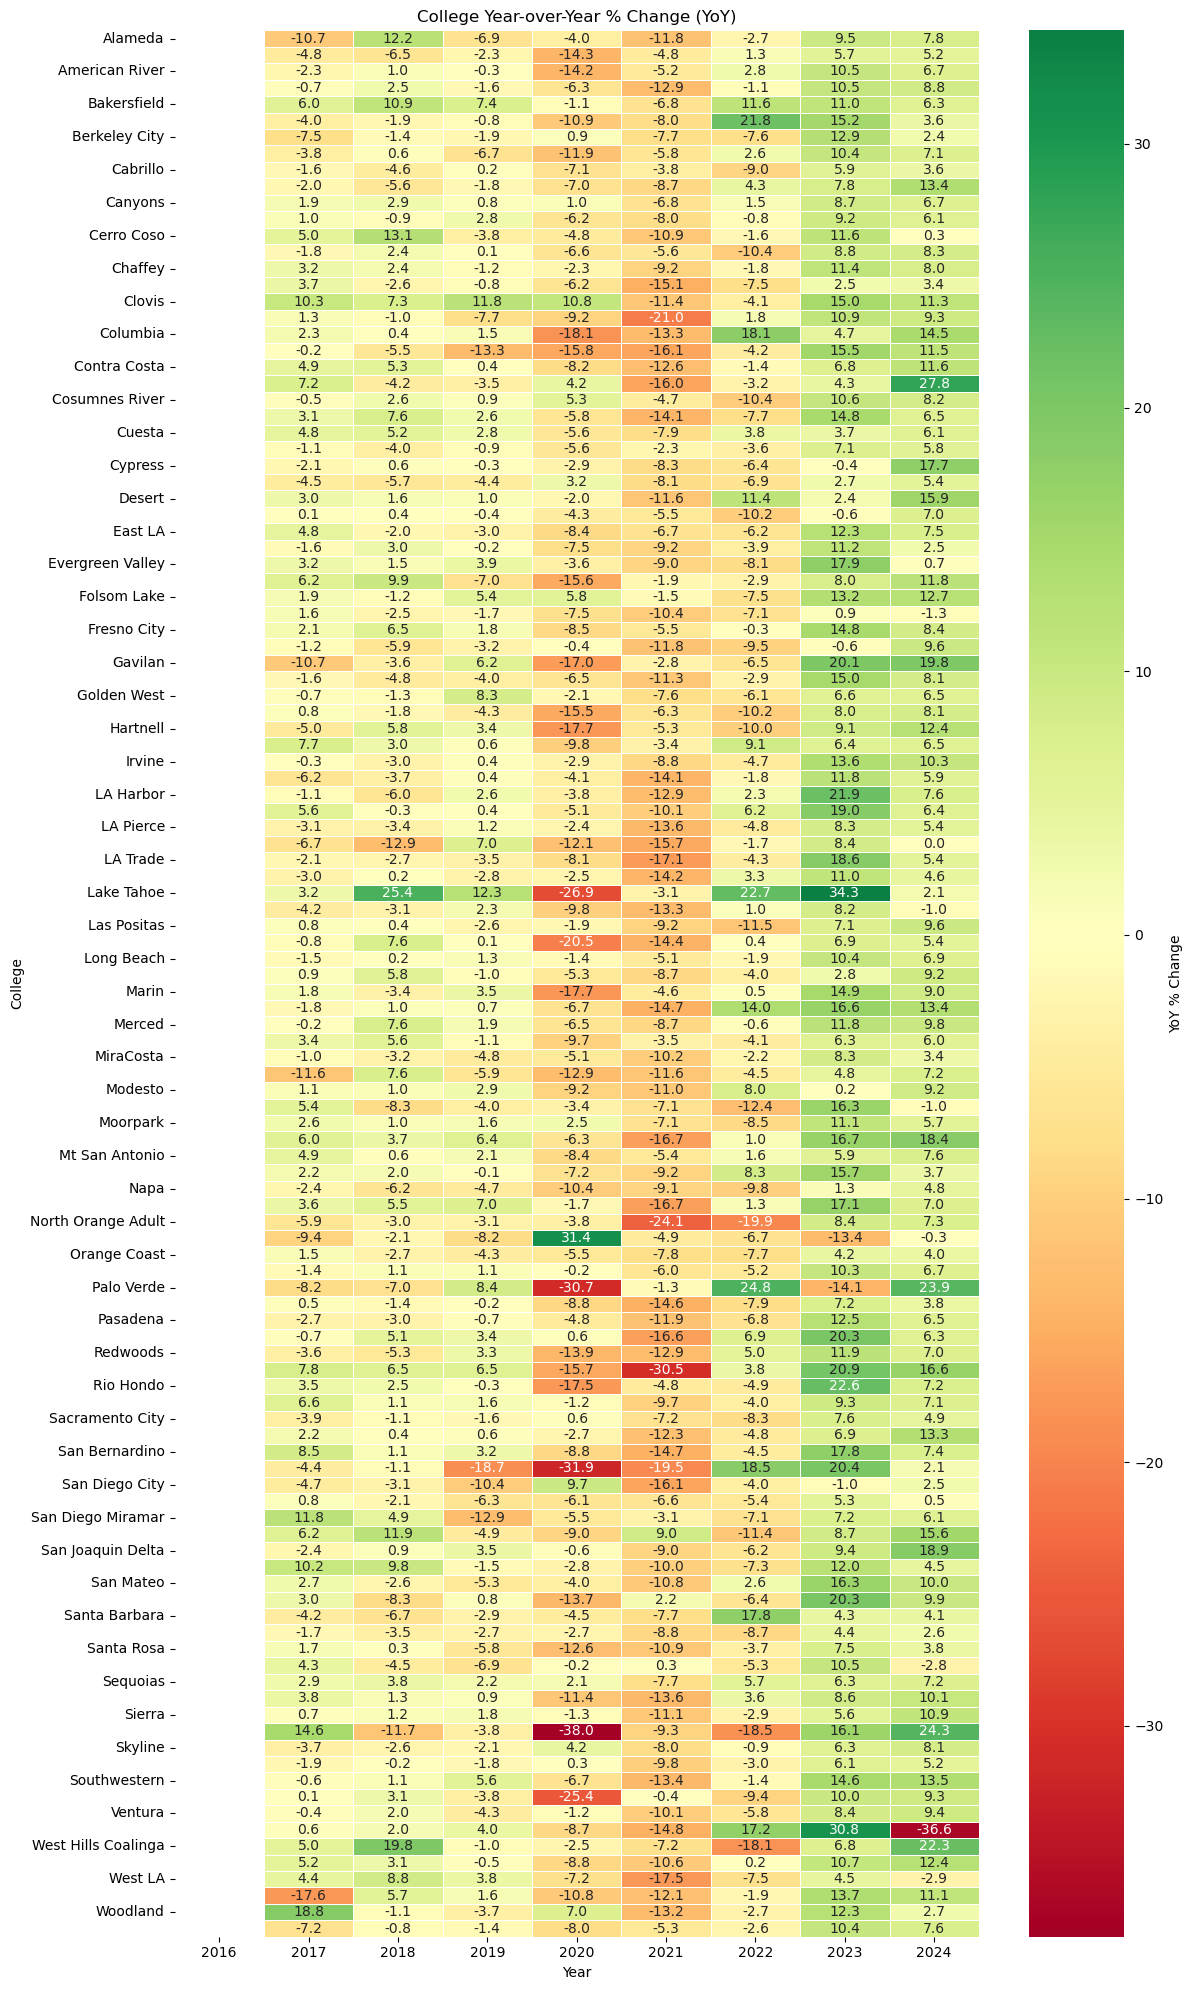

In [40]:
# Pivot table: colleges as rows, years as columns
yoy_pivot = college_year.pivot(index='college', columns='year', values='YoY_pct')

plt.figure(figsize=(12, 20))
sns.heatmap(
    yoy_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap="RdYlGn", 
    center=0, 
    linewidths=0.5,
    cbar_kws={'label': 'YoY % Change'}
)
plt.title("College Year-over-Year % Change (YoY)")
plt.ylabel("College")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [41]:
count_cldf[count_cldf['college'] == 'Deanza']

,college,term_year,count,percent,term,year
27,Deanza,Fall 2016,21867.0,1.31,Fall,2016
143,Deanza,Fall 2017,20826.0,1.24,Fall,2017
259,Deanza,Fall 2018,19638.0,1.17,Fall,2018
375,Deanza,Fall 2019,18880.0,1.14,Fall,2019
491,Deanza,Fall 2020,18872.0,1.29,Fall,2020
607,Deanza,Fall 2021,17091.0,1.26,Fall,2021
723,Deanza,Fall 2022,16411.0,1.18,Fall,2022
839,Deanza,Fall 2023,17190.0,1.14,Fall,2023
955,Deanza,Fall 2024,17975.0,1.14,Fall,2024
1070,Deanza,Spring 2016,19643.0,1.19,Spring,2016
